In [1]:
import pandas as pd

labels_path = "../dataset/reduced/unprocessed_train_reduced.csv"
df = pd.read_csv(labels_path)
df.head(3)

,Unnamed: 0,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
0,0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1
1,1,10005,1,0,1,0,1,0,0,1,0,0,1,0,0,0
2,2,10007,1,0,1,0,1,0,0,1,0,0,1,0,0,0


In [2]:
df.shape

(2886, 16)

# Some (not even exploratory) data analysis

Let us analysis the columns to ensure that they are the values we expect. We want to ensure that:
1. For any `healthy` and `injury` column only one or the other occurs (e.g. cannot be both `healthy=1` and `injury=1`)
2. We want to ensure `_low` and `_high` also sum to one

In [3]:
checks = [
    df[(df["bowel_healthy"] == 1) & (df["bowel_injury"] == 1)],
    df[(df["bowel_healthy"] == 0) & (df["bowel_injury"] == 0)],
    df[(df["extravasation_healthy"] == 1) & (df["extravasation_injury"] == 1)],
    df[(df["extravasation_healthy"] == 0) & (df["extravasation_injury"] == 0)],
    df[(df["kidney_low"] == 1) & (df["kidney_high"] == 1)],
    df[(df["liver_low"] == 1) & (df["liver_high"] == 1)],
    df[(df["spleen_low"] == 1) & (df["spleen_high"] == 1)],
    df[(df["kidney_healthy"] == 0) & (df["kidney_low"] == 0) & (df["kidney_high"] == 0)],
    df[(df["liver_healthy"] == 0) & (df["liver_low"] == 1) & (df["liver_high"] == 1)],
    df[(df["spleen_healthy"] == 0) & (df["spleen_low"] == 1) & (df["spleen_high"] == 1)],
]

for check in checks:
    assert len(check) == 0

In [4]:
df["bowel"] = (df["bowel_injury"] == 1).astype(int) # bowel is either injured or not
df["extravastion"] = (df["extravasation_injury"] == 1).astype(int)
df["kidney"] = (df["kidney_healthy"] == 0).astype(int)
df["liver"] = (df["liver_healthy"] == 0).astype(int)
df["spleen"] = (df["spleen_healthy"] == 0).astype(int)

In [5]:
print(df["bowel"].value_counts())
print(df["extravastion"].value_counts())
print(df["kidney"].value_counts())
print(df["liver"].value_counts())
print(df["spleen"].value_counts())

bowel
0    2827
1      59
Name: count, dtype: int64
extravastion
0    2697
1     189
Name: count, dtype: int64
kidney
0    2718
1     168
Name: count, dtype: int64
liver
0    2585
1     301
Name: count, dtype: int64
spleen
0    2552
1     334
Name: count, dtype: int64


In [6]:
new_df = df[["patient_id", "bowel", "extravastion", "kidney", "liver", "spleen"]]
new_df.head()

,patient_id,bowel,extravastion,kidney,liver,spleen
0,10004,0,1,1,0,1
1,10005,0,0,0,0,0
2,10007,0,0,0,0,0
3,10026,0,0,0,0,0
4,10051,0,0,0,0,1


In [14]:
how_many_bad_samples_ahhhhhh = len(new_df[(new_df["bowel"] == 0) & (new_df["extravastion"] == 0) & (new_df["kidney"] == 0) & (new_df["liver"] == 0) & (new_df["spleen"] == 0)])
total_samples = len(new_df)
print(how_many_bad_samples_ahhhhhh)
print(total_samples)
print(how_many_bad_samples_ahhhhhh / total_samples)

2084
2886
0.7221067221067221


Look at this. Haha. So funny. 72% of our data is just 0s and imbalances our data.

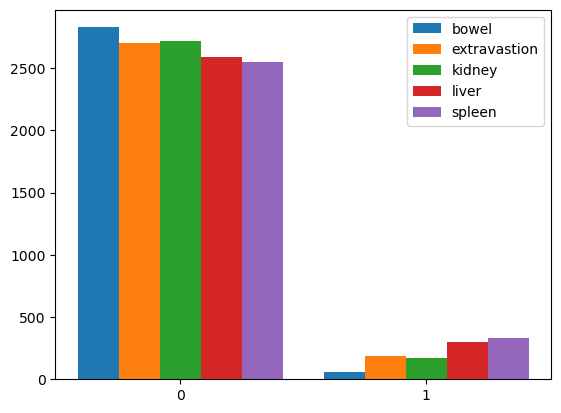

In [7]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()

b_heights, b_bins = np.histogram(new_df['bowel'],bins=[-0.5,0.5,1.5])
e_heights, e_bins = np.histogram(new_df['extravastion'], bins=b_bins)
k_heights, k_bins = np.histogram(new_df['kidney'], bins=e_bins)
l_heights, l_bins = np.histogram(new_df['liver'], bins=k_bins)
s_heights, s_bins = np.histogram(new_df['spleen'], bins=l_bins)


width = (b_bins[1] - b_bins[0])/6.0

ax.bar(b_bins[:-1]+width, b_heights, width=width)
ax.bar(e_bins[:-1]+width*2, e_heights, width=width)
ax.bar(k_bins[:-1]+width*3, k_heights, width=width)
ax.bar(l_bins[:-1]+width*4, l_heights, width=width)
ax.bar(s_bins[:-1]+width*5, s_heights, width=width)
ax.get_xaxis().set_ticks([0.0, 1.0])

plt.legend(["bowel", "extravastion", "kidney", "liver", "spleen"], loc="upper right")
plt.show()

We notice that the dataset is quite imbalanced towards non-injured organs. Definitely a good thing for patients! But a bad thing for training our model.

The below is the reduced dataframe wiht a more balanced labelling.

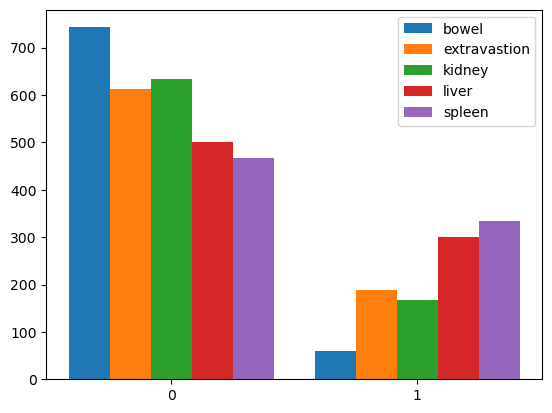

In [15]:
reduced_df = new_df[(new_df["bowel"] == 1) | (new_df["extravastion"] == 1) | (new_df["kidney"] == 1) | (new_df["liver"] == 1) | (new_df["spleen"] == 1)]

import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()

b_heights, b_bins = np.histogram(reduced_df['bowel'],bins=[-0.5,0.5,1.5])
e_heights, e_bins = np.histogram(reduced_df['extravastion'], bins=b_bins)
k_heights, k_bins = np.histogram(reduced_df['kidney'], bins=e_bins)
l_heights, l_bins = np.histogram(reduced_df['liver'], bins=k_bins)
s_heights, s_bins = np.histogram(reduced_df['spleen'], bins=l_bins)


width = (b_bins[1] - b_bins[0])/6.0

ax.bar(b_bins[:-1]+width, b_heights, width=width)
ax.bar(e_bins[:-1]+width*2, e_heights, width=width)
ax.bar(k_bins[:-1]+width*3, k_heights, width=width)
ax.bar(l_bins[:-1]+width*4, l_heights, width=width)
ax.bar(s_bins[:-1]+width*5, s_heights, width=width)
ax.get_xaxis().set_ticks([0.0, 1.0])

plt.legend(["bowel", "extravastion", "kidney", "liver", "spleen"], loc="upper right")
plt.show()

## Class Imbalances

One idea we can attempt is to weight the loss function.

Here is a reference of how we will attempt to balance our dataset by weighting the loss function: https://discuss.pytorch.org/t/multi-label-multi-class-class-imbalance/37573/17

In [24]:
print(df["bowel"].value_counts())
print(df["bowel"].value_counts()[0])
print(df["bowel"].value_counts()[1])

bowel
0    2827
1      59
Name: count, dtype: int64
2827
59


In [30]:
weights = {
    "bowel": df["bowel"].value_counts()[0] / df["bowel"].value_counts()[1],
    "extravastion": df["extravastion"].value_counts()[0] / df["extravastion"].value_counts()[1],
    "kidney": df["kidney"].value_counts()[0] / df["kidney"].value_counts()[1],
    "liver": df["liver"].value_counts()[0] / df["liver"].value_counts()[1],
    "spleen": df["spleen"].value_counts()[0] / df["spleen"].value_counts()[1]
}

total = sum(weights.values())
normalized_data = {key: round(value / total, 5) for key, value in weights.items()}
normalized_data

{'bowel': 0.50654,
 'extravastion': 0.15086,
 'kidney': 0.17103,
 'liver': 0.09079,
 'spleen': 0.08078}

In [16]:
def oversample(data, column_name):
    # Identify the majority and minority classes
    majority_class_size = data[column_name].value_counts().max()
    minority_rows = data[data[column_name] == data[column_name].value_counts().idxmin()]
    
    # Oversample minority rows
    oversampled_minority_rows = minority_rows.sample(n=majority_class_size, replace=True, random_state=42)
    
    # Combine with the rest of the data
    oversampled_data = pd.concat([data, oversampled_minority_rows])
    
    return oversampled_data

# Oversample based on 'bowel'
final_oversampled_data = oversample(reduced_df, 'bowel')

# Now oversample the already oversampled data based on 'extravastion'
final_oversampled_data = oversample(final_oversampled_data, 'extravastion')
final_oversampled_data = oversample(final_oversampled_data, 'kidney')
final_oversampled_data = oversample(final_oversampled_data, 'liver')
final_oversampled_data = oversample(final_oversampled_data, 'spleen')

# Check the class distributions again
print(final_oversampled_data['bowel'].value_counts())
print(final_oversampled_data['extravastion'].value_counts())
print(final_oversampled_data['kidney'].value_counts())
print(final_oversampled_data['liver'].value_counts())
print(final_oversampled_data['spleen'].value_counts())


bowel
0    7581
1    6767
Name: count, dtype: int64
extravastion
0    8447
1    5901
Name: count, dtype: int64
kidney
1    8574
0    5774
Name: count, dtype: int64
liver
1    8703
0    5645
Name: count, dtype: int64
spleen
1    8681
0    5667
Name: count, dtype: int64


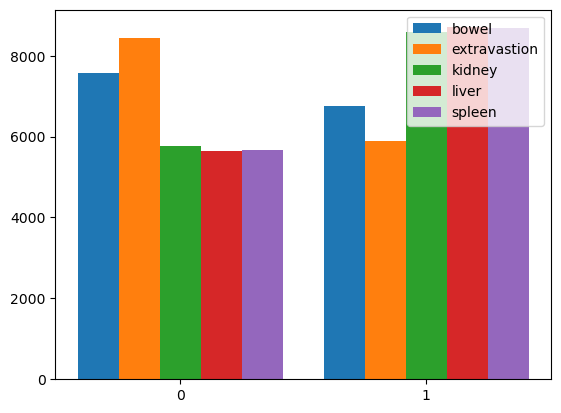

In [17]:
fig, ax = plt.subplots()

b_heights, b_bins = np.histogram(final_oversampled_data['bowel'],bins=[-0.5,0.5,1.5])
e_heights, e_bins = np.histogram(final_oversampled_data['extravastion'], bins=b_bins)
k_heights, k_bins = np.histogram(final_oversampled_data['kidney'], bins=e_bins)
l_heights, l_bins = np.histogram(final_oversampled_data['liver'], bins=k_bins)
s_heights, s_bins = np.histogram(final_oversampled_data['spleen'], bins=l_bins)


width = (b_bins[1] - b_bins[0])/6.0

ax.bar(b_bins[:-1]+width, b_heights, width=width)
ax.bar(e_bins[:-1]+width*2, e_heights, width=width)
ax.bar(k_bins[:-1]+width*3, k_heights, width=width)
ax.bar(l_bins[:-1]+width*4, l_heights, width=width)
ax.bar(s_bins[:-1]+width*5, s_heights, width=width)
ax.get_xaxis().set_ticks([0.0, 1.0])

plt.legend(["bowel", "extravastion", "kidney", "liver", "spleen"], loc="upper right")
plt.show()

# Saving new labels

In [18]:
import os
final_oversampled_data.to_csv(os.path.join("../dataset/reduced/", "train_balanced.csv"), index=False)